In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [38]:
# Load dataset
df = pd.read_csv(r"/content/Iris.csv")

In [39]:
# Select features and target
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [44]:
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42,stratify=y)

In [54]:
# Scale features (important for SVM)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [64]:
# Create and train SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [65]:
# Predict on test data
y_pred = model.predict(X_test)

In [66]:
# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[20  0  0]
 [ 0 20  0]
 [ 0  0 20]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      1.00      1.00        20
 Iris-virginica       1.00      1.00      1.00        20

       accuracy                           1.00        60
      macro avg       1.00      1.00      1.00        60
   weighted avg       1.00      1.00      1.00        60



In [67]:
for k in ['linear', 'rbf', 'poly']:
  model = SVC(kernel=k)
  model.fit(X_train, y_train)
  print(f"\nKernel: {k}")
  print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Kernel: linear
Accuracy: 1.0

Kernel: rbf
Accuracy: 0.9666666666666667

Kernel: poly
Accuracy: 0.9666666666666667


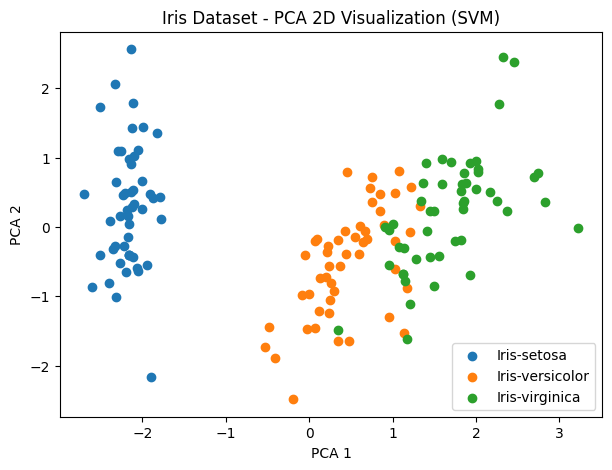

In [68]:

#  SIMPLE VISUALIZATION: PCA 2D PLOT
pca = PCA(n_components=2)
X_all_s = scaler.transform(X)
X_pca = pca.fit_transform(X_all_s)

plt.figure(figsize=(7,5))
for species in y.unique():
    mask = (y == species)
    plt.scatter(X_pca[mask,0], X_pca[mask,1], label=species)

plt.title("Iris Dataset - PCA 2D Visualization (SVM)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()